# K-Nearest Neighbors (KNN) Algorithm

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.


In [22]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import math as m
import operator

# Importing the Dataset
Import from /datasets/shipping.csv

In [23]:
# Read from the csv file
data = pd.read_csv('datasets/shipping.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Data Preprocessing
1. Check for missing values
2. Check for categorical data

In [24]:
# Check for missing values
print("Missing values in the dataset\n")
print(data.isnull().sum(), "\n\n")

# Check for the unique values in the columns
print("Unique values in the dataset")
print(data.nunique())


Missing values in the dataset

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64 


Unique values in the dataset
ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64


In [25]:

# Print data type
print("Data type of the columns")
print(data.dtypes)

Data type of the columns
ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [26]:
# View dimensions of dataset
print("Dimensions of the dataset")
print(data.shape)

# Print the columns
print("Columns in the dataset")
print(data.columns)

Dimensions of the dataset
(10999, 12)
Columns in the dataset
Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [27]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [28]:
print("Mode_of_Shipment unique values")
data['Mode_of_Shipment'].unique()


Mode_of_Shipment unique values


array(['Flight', 'Ship', 'Road'], dtype=object)

In [29]:
print(("Warehouse_block unique values"))
data['Warehouse_block'].unique()

Warehouse_block unique values


array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [30]:
print("Product_importance unique values")
data['Product_importance'].unique()

Product_importance unique values


array(['low', 'medium', 'high'], dtype=object)

In [31]:
# Drop ID column
data.drop('ID', axis=1, inplace=True)

data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [32]:
# View Sumary Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [33]:
# Frequence distribution of values in variables

for var in data.columns:
    print(data[var].value_counts(), "\n")

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64 

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64 

Customer_care_calls
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: count, dtype: int64 

Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64 

Cost_of_the_Product
245    110
257    109
260    106
254    101
264    100
      ... 
107      5
99       5
120      5
96       5
122      4
Name: count, Length: 215, dtype: int64 

Prior_purchases
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: count, dtype: int64 

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64 

Gender
F    5545
M    5454
Name: count, dtype: int64 

Discount_offered
10    860
2     858
6     849
9     845
3     840
     ... 
65     36
26     36
42     35
25     34
30     34
Name: count, Length: 65, d

In [34]:
# Convert Warehouse_block to numerical

data['Warehouse_block'] = data['Warehouse_block'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'F': 5})

# Convert Mode_of_Shipment to numerical

data['Mode_of_Shipment'] = data['Mode_of_Shipment'].map({'Ship': 1, 'Flight': 2, 'Road': 3})

data["Product_importance"] = data["Product_importance"].map({'low': 1, 'medium': 2, 'high': 3})

data["Gender"] = data["Gender"].map({'F': 1, 'M': 2})

data.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,4,2,177,3,1,1,44,1233,1
1,5,2,4,5,216,2,1,2,59,3088,1
2,1,2,2,2,183,4,1,2,48,3374,1
3,2,2,3,3,176,4,2,2,10,1177,1
4,3,2,2,2,184,3,2,1,46,2484,1


In [35]:
# Check missing values

data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# Data Visualization

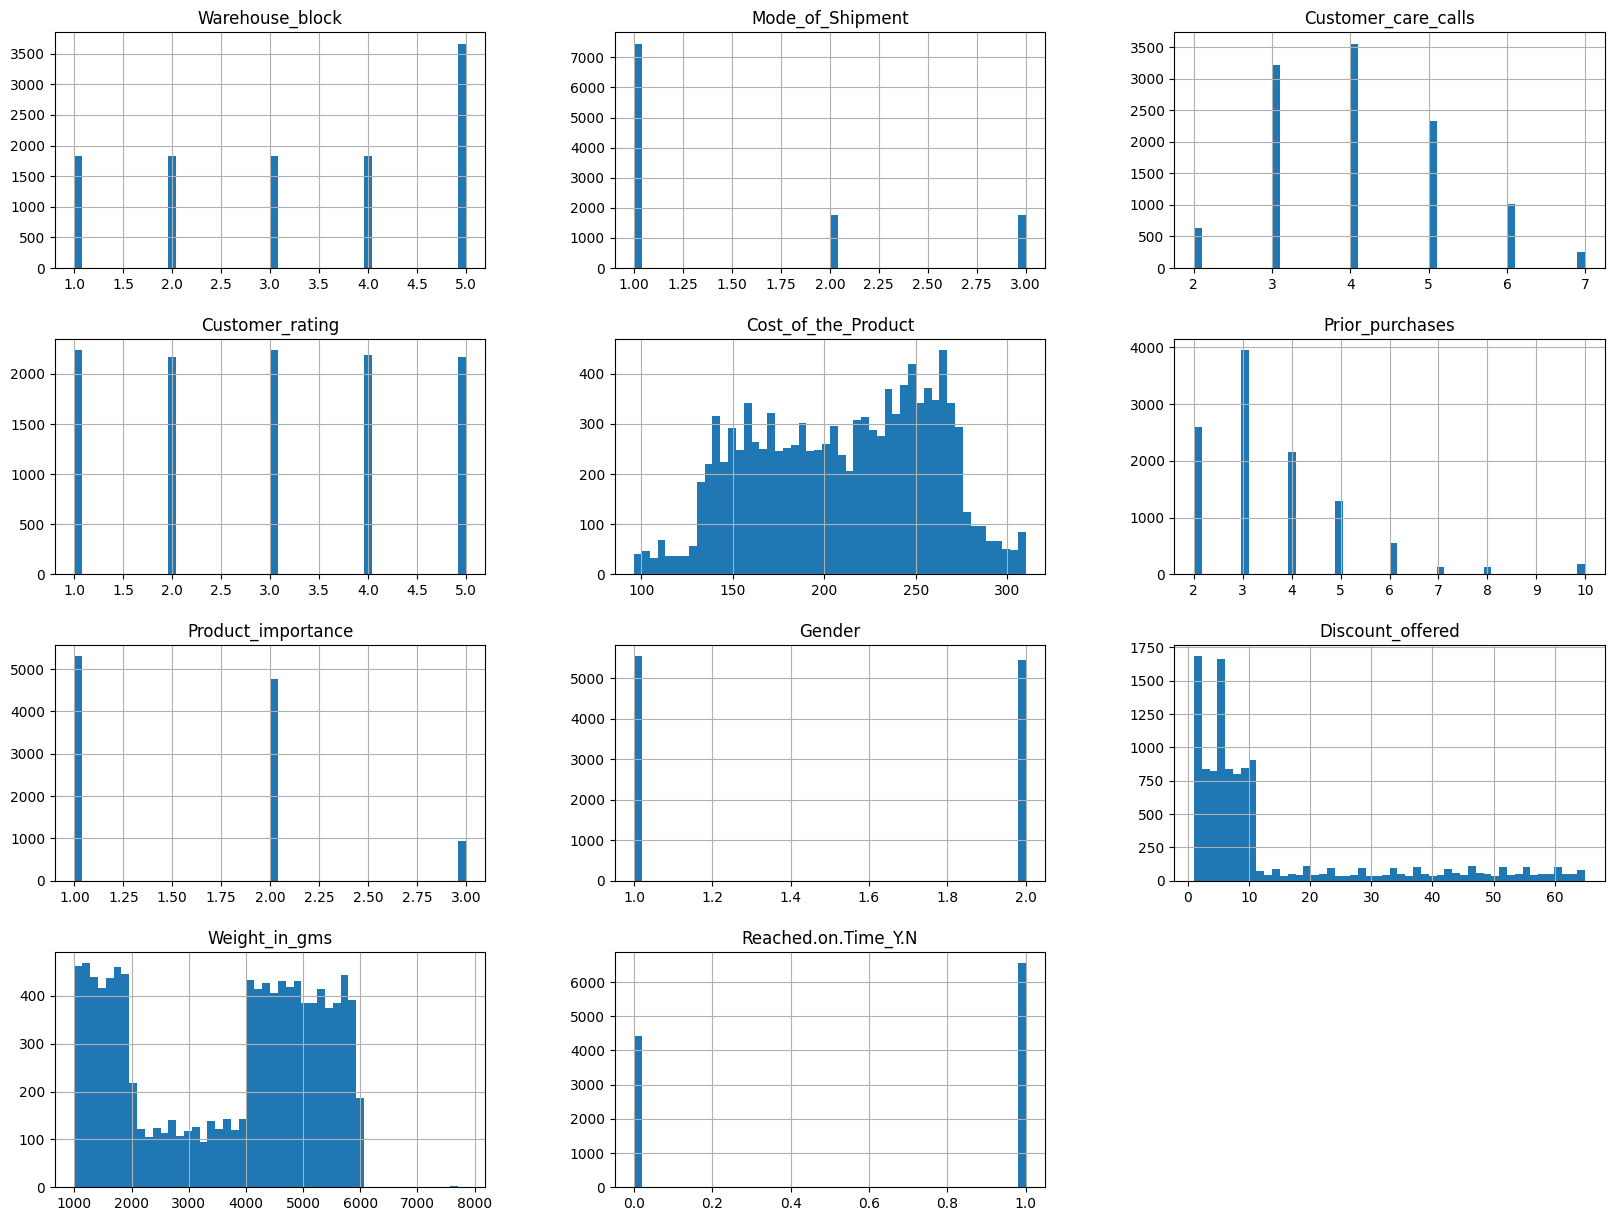

In [36]:
# Visualize the data
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20, 15))
plt.show()



# Multivariate Plots

In [41]:
correlation = data.corr()
correlation

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,-0.000888,0.014496,0.010169,-0.006679,-0.005262,-0.001528,-0.003700,0.009569,0.004086,0.005214
Mode_of_Shipment,-0.000888,1.000000,0.012508,0.000263,-0.001505,0.003673,0.004025,-0.001828,-0.010369,0.003420,-0.005321
Customer_care_calls,0.014496,0.012508,1.000000,0.012209,0.323182,0.180771,-0.058134,0.002545,-0.130750,-0.276615,-0.067126
Customer_rating,0.010169,0.000263,0.012209,1.000000,0.009270,0.013179,0.003999,0.002775,-0.003124,-0.001897,0.013119
Cost_of_the_Product,-0.006679,-0.001505,0.323182,0.009270,1.000000,0.123676,-0.046789,0.019759,-0.138312,-0.132604,-0.073587
Prior_purchases,-0.005262,0.003673,0.180771,0.013179,0.123676,1.000000,0.027317,-0.009395,-0.082769,-0.168213,-0.055515
Product_importance,-0.001528,0.004025,-0.058134,0.003999,-0.046789,0.027317,1.000000,-0.002974,0.026023,0.093211,0.020517
Gender,-0.003700,-0.001828,0.002545,0.002775,0.019759,-0.009395,-0.002974,1.000000,-0.011777,0.003573,0.004689
Discount_offered,0.009569,-0.010369,-0.130750,-0.003124,-0.138312,-0.082769,0.026023,-0.011777,1.000000,-0.376067,0.397108
Weight_in_gms,0.004086,0.003420,-0.276615,-0.001897,-0.132604,-0.168213,0.093211,0.003573,-0.376067,1.000000,-0.268793


In [44]:
correlation['Cost_of_the_Product'].sort_values(ascending=False)

Cost_of_the_Product    1.000000
Customer_care_calls    0.323182
Prior_purchases        0.123676
Gender                 0.019759
Customer_rating        0.009270
Mode_of_Shipment      -0.001505
Warehouse_block       -0.006679
Product_importance    -0.046789
Reached.on.Time_Y.N   -0.073587
Weight_in_gms         -0.132604
Discount_offered      -0.138312
Name: Cost_of_the_Product, dtype: float64

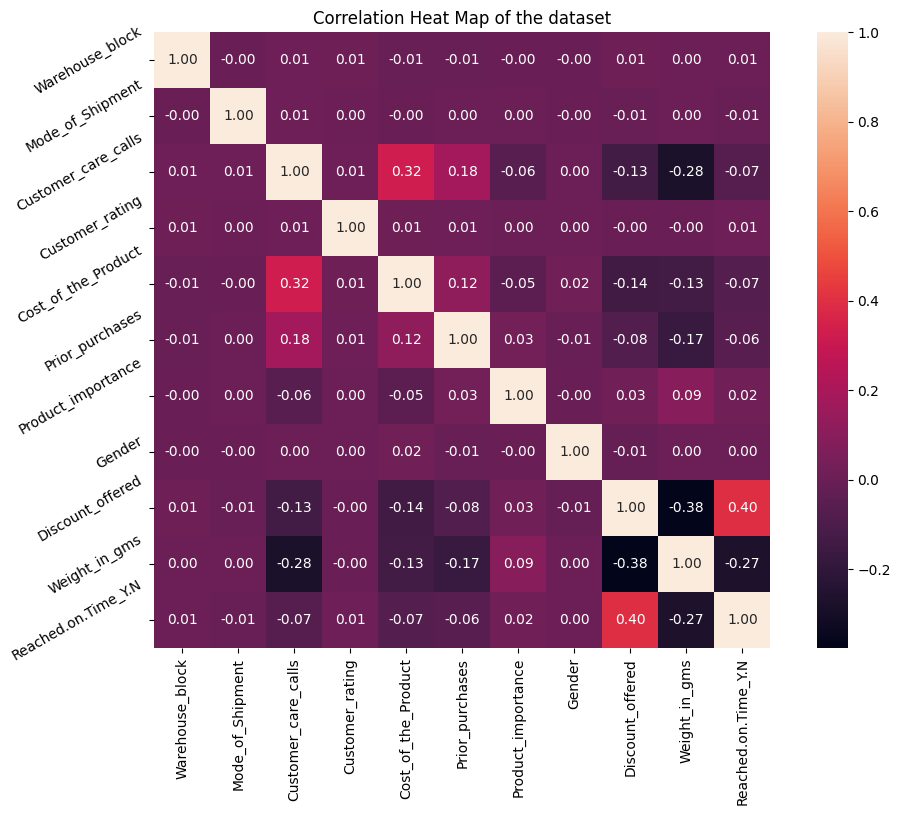

In [45]:
# Correlation Heat Map

import seaborn as sns

plt.figure(figsize=(12, 8)) 
plt.title('Correlation Heat Map of the dataset')

a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)

plt.show()

# Declare feature vector and target variable

In [46]:
X = data.drop('Customer_care_calls', axis=1)

y = data['Customer_care_calls']


# Split data into separate training and test set

In [48]:
from sklearn.model_selection import train_test_split

# Random state is set to 0 to ensure that the data is split in the same way
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [49]:
X_train.shape, X_test.shape

((8799, 10), (2200, 10))

In [50]:
# Feature Engineering

X_train.dtypes

Warehouse_block        int64
Mode_of_Shipment       int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

In [51]:
# Check missing values in numerical variables in X_train

X_train.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [52]:
X_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
628,3,1,1,104,4,2,1,23,1442,1
6297,2,2,1,293,5,2,1,7,1052,0
9252,4,1,4,257,4,2,1,8,4780,0
5365,5,1,4,213,3,3,1,4,5996,0
10529,5,3,2,235,2,2,1,9,5116,0


In [53]:
X_test.head()

,Warehouse_block,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
7262,1,2,2,240,2,2,2,4,4447,1
4795,5,2,4,247,4,1,1,2,1326,0
1121,5,1,1,264,3,2,2,10,3409,1
1328,1,1,1,201,3,2,1,65,2488,1
8098,3,2,2,242,3,3,2,9,4717,0


In [54]:
# Feature Scaling

cols = X_train.columns

In [55]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [56]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [57]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [58]:
X_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,-0.227908,-0.635859,-1.408157,-2.212307,0.287476,0.623720,-0.984773,0.574597,-1.336449,0.818121
1,-0.899495,0.689638,-1.408157,1.731732,0.950516,0.623720,-0.984773,-0.400818,-1.574276,-1.222312
2,0.443680,-0.635859,0.718094,0.980487,0.287476,0.623720,-0.984773,-0.339854,0.699109,-1.222312
3,1.115268,-0.635859,0.718094,0.062298,-0.375564,2.183287,-0.984773,-0.583708,1.440642,-1.222312
4,1.115268,2.015136,-0.699407,0.521392,-1.038604,0.623720,-0.984773,-0.278891,0.904006,-1.222312


In [62]:
# Fit K Neighbours Classifier to the training eet

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# Predict test-set results

y_pred = knn.predict(X_test)

y_pred


array([5, 6, 5, ..., 4, 4, 6])

In [66]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.3322727272727273


In [71]:
k_values = [i for i in range (4, 10)]
scores = []

for k in k_values:
  print("Training with k = ", k)
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

Training with k =  4
Training with k =  5
Training with k =  6
Training with k =  7
Training with k =  8
Training with k =  9


Text(0, 0.5, 'Accuracy Score')

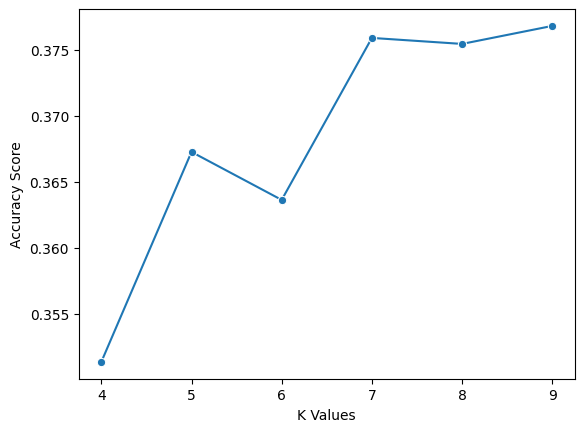

In [72]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [73]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [78]:
from sklearn.metrics import precision_score, recall_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.37681818181818183
Precision: 0.37681818181818183
Recall: 0.37681818181818183
